In [36]:
import yfinance as yf
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from xgboost import XGBClassifier

In [37]:
btc_ticker = yf.Ticker("BTC-USD")

In [38]:
btc = btc_ticker.history(period="max")

In [39]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-26 00:00:00+00:00,43599.847656,43603.175781,41676.488281,42520.402344,30026850982,0.0,0.0
2023-12-27 00:00:00+00:00,42518.468750,43683.160156,42167.582031,43442.855469,25260941032,0.0,0.0
2023-12-28 00:00:00+00:00,43468.199219,43804.781250,42318.550781,42627.855469,22992093014,0.0,0.0


In [40]:
btc.index = pd.to_datetime(btc.index).tz_localize(None)

In [41]:
del btc["Dividends"]
del btc["Stock Splits"]

In [42]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

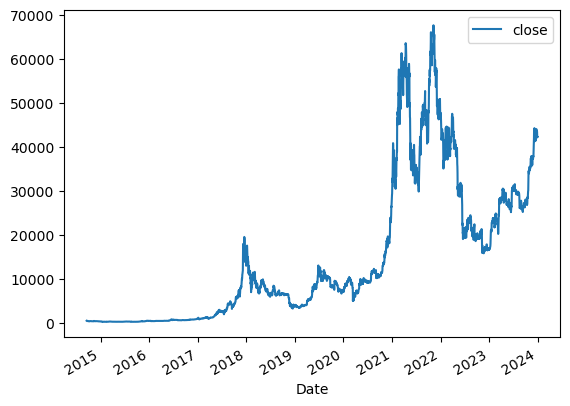

In [43]:
btc.plot.line(y="close", use_index=True)

In [44]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [45]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [46]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232192,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2023-12-25,43010.574219,43765.093750,42765.769531,43613.140625,21115795370,1.300000,-0.183883,0.272917
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,30026850982,1.100000,-0.161640,0.245139
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,25260941032,1.000000,-0.145745,0.222917
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,22992093014,0.466667,-0.147558,0.208333


In [47]:
btc["tomorrow"] = btc["close"].shift(-1)

In [48]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232192,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2023-12-25,43010.574219,43765.093750,42765.769531,43613.140625,21115795370,1.300000,-0.183883,0.272917,42520.402344
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,30026850982,1.100000,-0.161640,0.245139,43442.855469
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,25260941032,1.000000,-0.145745,0.222917,42627.855469
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,22992093014,0.466667,-0.147558,0.208333,42099.402344


In [49]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [50]:
btc["target"].value_counts()

target
1    1794
0    1597
Name: count, dtype: int64

In [51]:
# cant use cross validations due to the data being ordered
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=69)
train = btc.iloc[:-200]
test = btc[-200:]

predictors = [
    "close",
    "volume",
    "open",
    "high",
    "low",
    "edit_count",
    "sentiment",
    "neg_sentiment",
]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=69)

In [52]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.43956043956043955

In [53]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    precision_score(test["target"], preds)
    combined = pd.concat([test["target"], preds], axis=1)
    return combined


def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i : (i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [54]:
model = XGBClassifier(random_state=69, learning_rate=0.001, n_estimators=500)
predictions = backtest(btc, model, predictors)
precision_score(predictions["target"], predictions["predictions"])

0.5073099415204678

In [55]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictiors = ['close', 'sentiment', 'neg_sentiment']
    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()
        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc['close'] / rolling_averages['close']

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages['edit_count']

        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling['target']

        new_predictiors += [ratio_column, trend_column, edit_column]
    return btc, new_predictiors

In [56]:
btc, new_predictors = compute_rolling(btc.copy()) 

In [57]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232192,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,43010.574219,43765.093750,42765.769531,43613.140625,21115795370,1.300000,-0.183883,0.272917,42520.402344,0,...,0.5,1.003726,7.504762,0.571429,1.121432,9.042778,0.566667,1.533814,1.967763,0.495890
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,30026850982,1.100000,-0.161640,0.245139,43442.855469,1,...,0.5,0.977774,5.280952,0.571429,1.089315,9.048333,0.566667,1.491705,1.970046,0.493151
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,25260941032,1.000000,-0.145745,0.222917,42627.855469,0,...,0.5,0.999674,3.614286,0.571429,1.108520,9.052222,0.566667,1.520161,1.971233,0.495890
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,22992093014,0.466667,-0.147558,0.208333,42099.402344,0,...,0.5,0.984939,2.333333,0.428571,1.083995,9.047222,0.550000,1.487923,1.969954,0.495890


In [58]:
predictions = backtest(btc, model, new_predictors)
precision_score(predictions['target'], predictions['predictions'])

0.5234375

In [59]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,1
2017-09-18,0,1
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-12-25,0,0
2023-12-26,1,1
2023-12-27,0,0
2023-12-28,0,1


In [60]:
# to improve we can improve our proxy for bitcoin sentiment this will be a big improvement and we can add in other data such as the s&p or the usd index we can also tune the model 